In [3]:
import sys
print(sys.executable)
print(sys.version)

C:\Users\mepri\SentimentAnalysis_Airlines\venv\Scripts\python.exe
3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]


In [4]:
import os
print(os.getcwd())

C:\Users\mepri\SentimentAnalysis_Airlines\notebook


In [5]:
print(os.path.exists("../images"))

True


In [6]:
import sys
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: C:\Users\mepri\SentimentAnalysis_Airlines\venv\Scripts\python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import OrdinalEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.metrics import roc_auc_score,f1_score, precision_score, recall_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import Randomize
import html

In [8]:
##columns =  ['text' ,'sentiment']

#df = pd.read_csv("../data/airline_tweets_train.txt" )##, sep='\\t', engine = 'python', names  = columns)

df = pd.read_csv(
    "../data/airline_tweets_train.csv",
    encoding="utf-8"
)

#df_unlabelled_test = pd.read_csv(
 #"../data/airline_tweets_test.csv",
  #encoding="utf-8"
#)

## Dataset Overview

In [9]:
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"\nShape: {df.shape}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nSentiment Count: {df['airline_sentiment'].value_counts()}")
print(f"\nSentiment Count Percentage : {df['airline_sentiment'].value_counts(normalize=True)*100}")

DATASET OVERVIEW

Shape: (4008, 6)

Missing values:
Id                      0
airline_sentiment       0
airline                 0
text                    0
retweet_count           0
user_timezone        1280
dtype: int64

Data types:
Id                    int64
airline_sentiment    object
airline              object
text                 object
retweet_count         int64
user_timezone        object
dtype: object

Sentiment Count: airline_sentiment
negative    2227
positive    1781
Name: count, dtype: int64

Sentiment Count Percentage : airline_sentiment
negative    55.563872
positive    44.436128
Name: proportion, dtype: float64


## Previewing the Dataset

In [10]:
df.head()

,Id,airline_sentiment,airline,text,retweet_count,user_timezone
0,1450,negative,American,@AmericanAir thanks for the response. I know i...,0,NaN
1,7983,positive,US Airways,@USAirways I'm enjoying my flights so far! You...,0,London
2,6479,positive,United,Hey @united you've upgraded me on a 10 hour In...,0,Amsterdam
3,2478,negative,United,"@united ""where we trick you into making us loo...",1,NaN
4,6366,positive,United,@united it was delivered! Thank you for making...,0,NaN


### For further EDA we need to add some features to the dataset

## Feature Engineering

In [11]:
def remove_hashtags_mentions(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'@\w+|#\w+', '', text)
    text = html.unescape(text)
    return text




In [12]:
df['text'] = df['text'].apply(remove_hashtags_mentions)
df['text_length'] = df['text'].str.len()
df['word_count']  =  df["text"].str.split().str.len()




#df_test['text'] = df_test['text'].apply(remove_hashtags_mentions)
#df_test['text_length'] = df_test['text'].str.len()
#df_test['word_count']  =  df_test["text"].str.split().str.len()

In [13]:
#positive_words = ["great", "excellent", "love", "amazing", "perfect"]
negative_words = ["bad", "worst", "waste", "junk", "disappointed", "hate", 
                 "cheap" , "difficult" , "hungry", "worst" ,"fault","cancelled", "delayed","stuck","suck","ridiculous","lost","terrible"]

#df["pos_word_count"] = df["text"].str.lower().str.count("|".join(positive_words))
df["neg_word_count"] = df["text"].str.lower().str.count("|".join(negative_words))
df["all_caps_count"] = df["text"].str.findall(r"\b[A-Z]{2,}\b").str.len()


#df_test["neg_word_count"] = df_test["text"].str.lower().str.count("|".join(negative_words))
#df_test["all_caps_count"] = df_test["text"].str.findall(r"\b[A-Z]{2,}\b").str.len()

In [14]:
df['exclamations'] = df.text.apply(lambda x: x.count('!'))
#df['capital_letters'] = df.text.apply(lambda x: sum(1 for c in x if c.isupper()))
df["has_negation"] = (
    df["text"]
    .str.lower()
    .str.contains(r"\b(not|no|never|don\'t|doesn\'t|didn\'t|can\'t|won\'t)\b")
    .astype(int)
)


#df_test['exclamations'] = df_test.text.apply(lambda x: x.count('!'))
#df['capital_letters'] = df.text.apply(lambda x: sum(1 for c in x if c.isupper()))

#df_test["has_negation"] = (
 #   df_test["text"]
  #.str.lower()
   #.str.contains(r"\b(not|no|never|don\'t|doesn\'t|didn\'t|can\'t|won\'t)\b")
    #.astype(int)
#)

C:\Users\mepri\AppData\Local\Temp\ipykernel_25008\3848773092.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  .str.contains(r"\b(not|no|never|don\'t|doesn\'t|didn\'t|can\'t|won\'t)\b")


In [15]:
df["sentiment"] = (df["airline_sentiment"] == "positive").astype(int)


In [16]:
print(f"\nSentiment Count: {df['sentiment'].value_counts()}")


Sentiment Count: sentiment
0    2227
1    1781
Name: count, dtype: int64


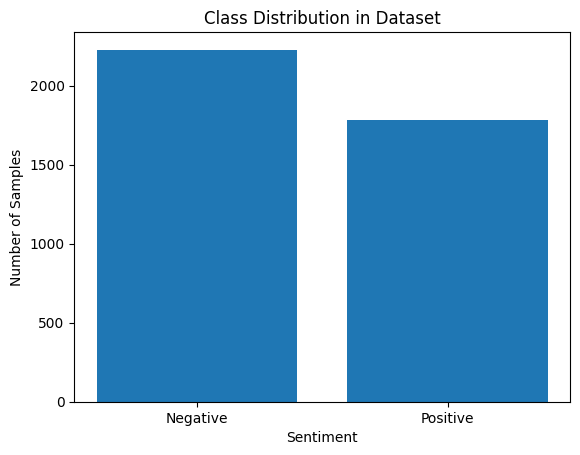

In [17]:

class_counts = df["sentiment"].value_counts().sort_index()

plt.figure()
plt.bar(class_counts.index, class_counts.values)
plt.xticks(class_counts.index, ["Negative", "Positive"])
plt.xlabel("Sentiment")
plt.ylabel("Number of Samples")
plt.savefig('../images/class_distribution.png')
plt.title("Class Distribution in Dataset")
plt.show()

## Remove ID and user_timezone column. Id doesnt add any value. User Timezone has many missing values. Airline_sentiment is dropped as it has been encoded as Sentiment

In [18]:
df = df.drop(["Id", "user_timezone", "airline_sentiment"],axis = 1)

#df_test = df_test.drop(["Id", "user_timezone"],axis = 1)

In [19]:
df.head()

,airline,text,retweet_count,text_length,word_count,neg_word_count,all_caps_count,exclamations,has_negation,sentiment
0,American,thanks for the response. I know it's not your...,0,114,25,2,1,0,1,0
1,US Airways,I'm enjoying my flights so far! You're doing ...,0,123,21,0,0,1,0,1
2,United,Hey you've upgraded me on a 10 hour Internati...,0,87,16,0,0,1,0,1
3,United,"""where we trick you into making us look popul...",1,89,16,1,0,0,0,0
4,United,it was delivered! Thank you for making sure i...,0,71,13,0,0,2,0,1


## EDA

## Text distribution

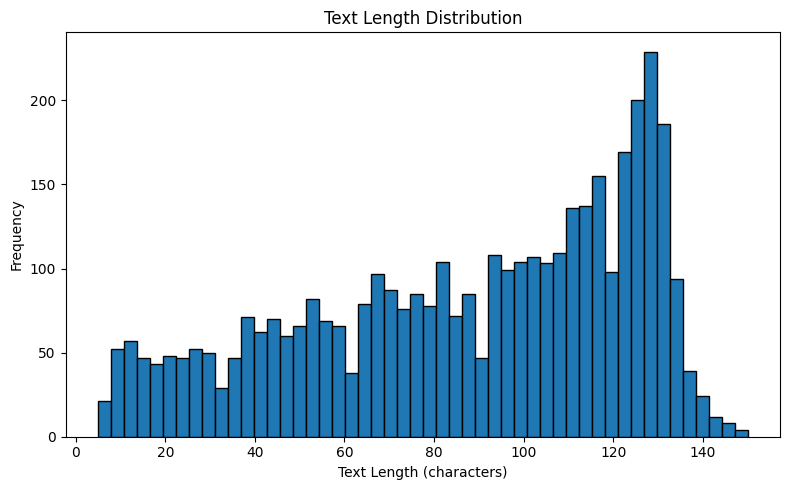

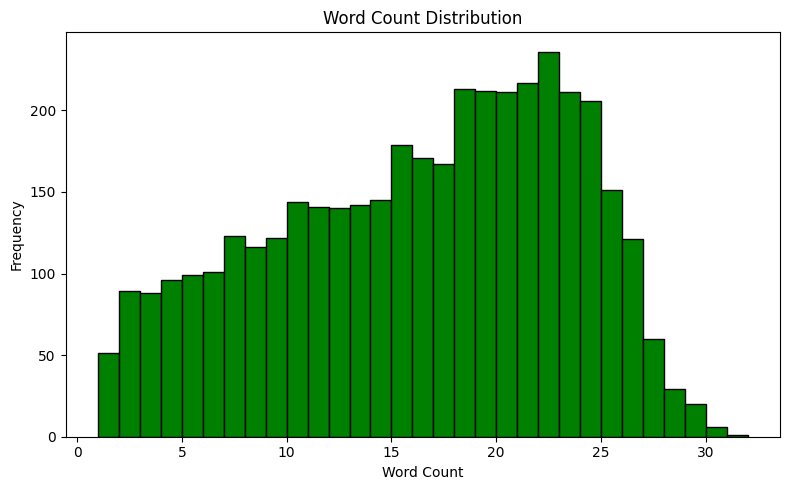

In [20]:
plt.figure(figsize=(8, 5))
plt.hist(df["text_length"], bins=50, edgecolor='black')
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.title("Text Length Distribution")
plt.tight_layout()
plt.savefig('../images/text_length_distribution.png')
plt.show()

plt.figure(figsize=(8, 5))
max_len = df["word_count"].max()
plt.hist(
    df["word_count"],
    bins=np.arange(1, max_len + 2), edgecolor = 'black', color = 'green'
)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Word Count Distribution")
plt.tight_layout()
plt.savefig('../images/word_count_distribution.png')
plt.show()









## EDA by Target Variable = Sentiment

In [21]:

df.groupby("sentiment")[["text_length", "word_count", "exclamations","neg_word_count","all_caps_count" ,"retweet_count"]].mean()

,text_length,word_count,exclamations,neg_word_count,all_caps_count,retweet_count
sentiment,,,,,,
0,99.976650,18.350696,0.284239,0.293669,0.402335,0.092950
1,71.169568,12.676586,0.833240,0.046603,0.447501,0.062325


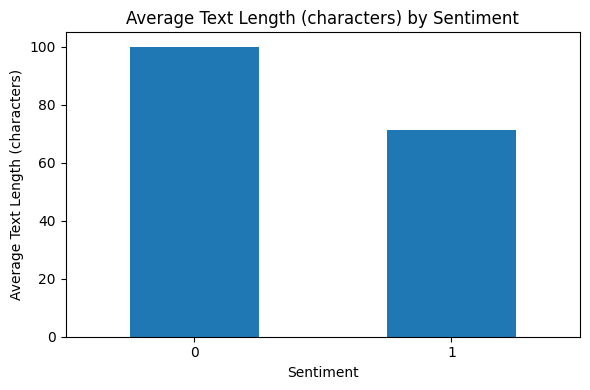

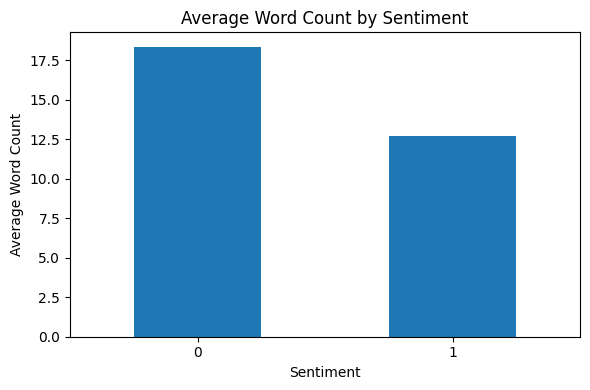

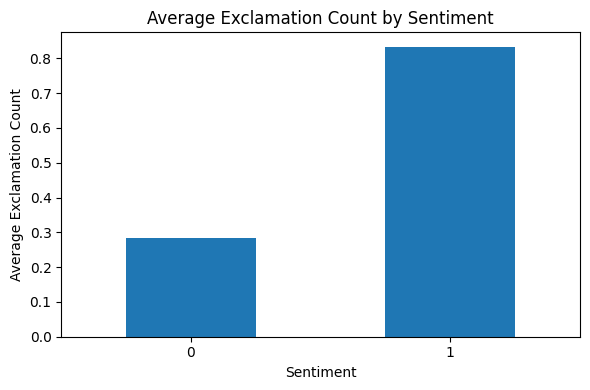

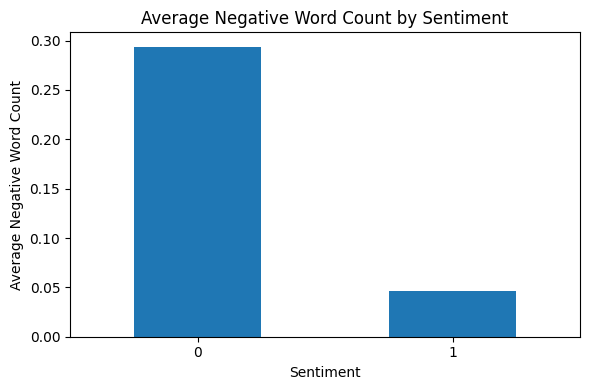

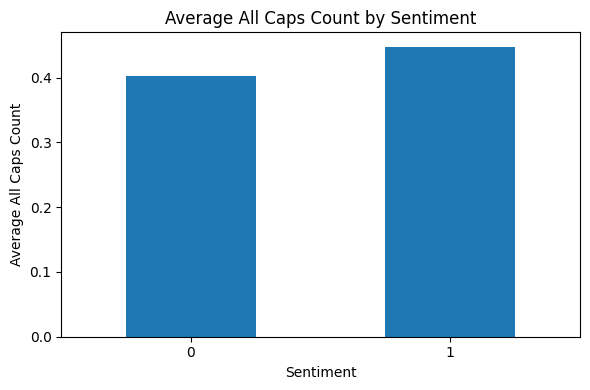

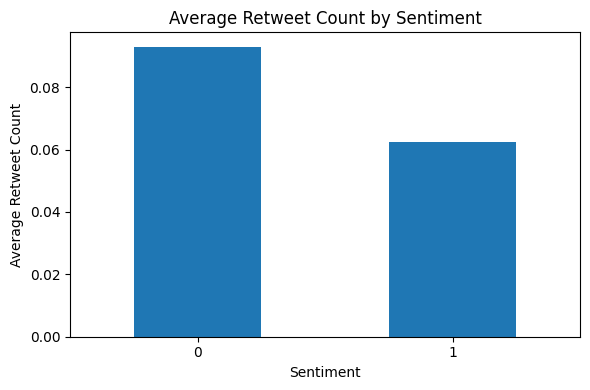

In [22]:



numeric_columns = [
    "text_length",
    "word_count",
    "exclamations",
    "neg_word_count",
    "all_caps_count",
    "retweet_count"
]

label_map = {
    "text_length": "Text Length (characters)",
    "word_count": "Word Count",
    "exclamations": "Exclamation Count",
    "neg_word_count": "Negative Word Count",
    "all_caps_count": "All Caps Count",
    "retweet_count": "Retweet Count"
}

for col in numeric_columns:
    means = df.groupby("sentiment")[col].mean()

    plt.figure(figsize=(6, 4))
    means.plot(kind="bar")

    plt.title(f"Average {label_map[col]} by Sentiment")
    plt.ylabel(f"Average {label_map[col]}")
    plt.xlabel("Sentiment")

    plt.xticks(rotation=0)
    plt.tight_layout()
    directory = f"../images/Average {label_map[col]} by Sentiment.png"
    plt.savefig(directory)
    plt.show()


## Key Insights
1. Negative Reviews has more text lenght
2. Negative Reviews has more word count
3. Negative Reviews have more negative words
4. Position Reviews have more excalamations
5. Positive Reviews have more capital words
6. Negative Reviews have more retweets then positive reviews


CORRELATION ANALYSIS
                text_length  word_count  sentiment  exclamations  \
text_length        1.000000    0.957243  -0.389326     -0.068001   
word_count         0.957243    1.000000  -0.398904     -0.080293   
sentiment         -0.389326   -0.398904   1.000000      0.268645   
exclamations      -0.068001   -0.080293   0.268645      1.000000   
neg_word_count     0.247494    0.215290  -0.276611     -0.074339   
all_caps_count     0.106070    0.118234   0.020483      0.188537   
retweet_count      0.033333    0.022055  -0.027942      0.007234   

                neg_word_count  all_caps_count  retweet_count  
text_length           0.247494        0.106070       0.033333  
word_count            0.215290        0.118234       0.022055  
sentiment            -0.276611        0.020483      -0.027942  
exclamations         -0.074339        0.188537       0.007234  
neg_word_count        1.000000        0.020875       0.005704  
all_caps_count        0.020875        1.000000   

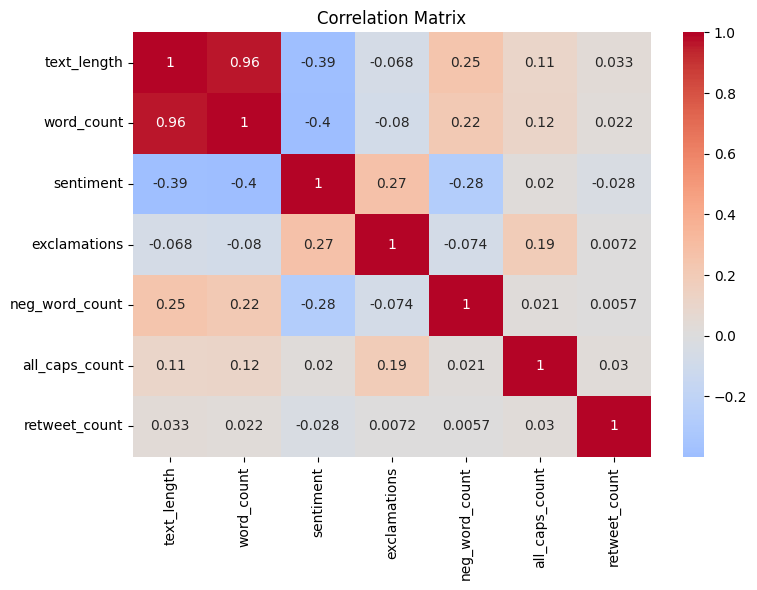

In [23]:
# 7. CORRELATION ANALYSIS
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)
df[numeric_columns].corrwith(df.sentiment).abs().sort_values(ascending=False)
# Numeric features correlation
numeric_features = ['text_length', 'word_count', 'sentiment','exclamations', 'neg_word_count', 'all_caps_count', 'retweet_count']
correlation_matrix = df[numeric_features].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('../images/correlation_matrix.png')
plt.show()


In [24]:

df_grouped = df.groupby('has_negation')['has_negation'].count()

df_grouped


has_negation
0    2960
1    1048
Name: has_negation, dtype: int64

In [25]:
pd.crosstab(df["has_negation"], df["sentiment"])

sentiment,0,1
has_negation,,
0,1356,1604
1,871,177


In [26]:
df_grouped = df.groupby('airline')['airline'].count()

df_grouped

airline
American           729
Delta              652
Southwest          738
US Airways         722
United            1010
Virgin America     157
Name: airline, dtype: int64

In [27]:
pd.crosstab(df["airline"], df["sentiment"])


sentiment,0,1
airline,,
American,486,243
Delta,236,416
Southwest,299,439
US Airways,519,203
United,645,365
Virgin America,42,115


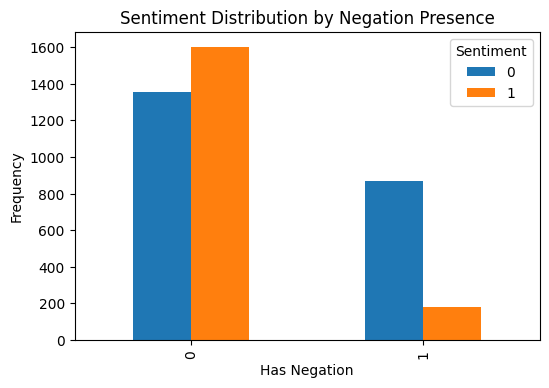

In [28]:

ct = pd.crosstab(df["has_negation"], df["sentiment"])
ct.plot(kind="bar", figsize=(6,4))
plt.title("Sentiment Distribution by Negation Presence")
plt.xlabel("Has Negation")
plt.ylabel("Frequency")
plt.legend(title="Sentiment")
plt.show()

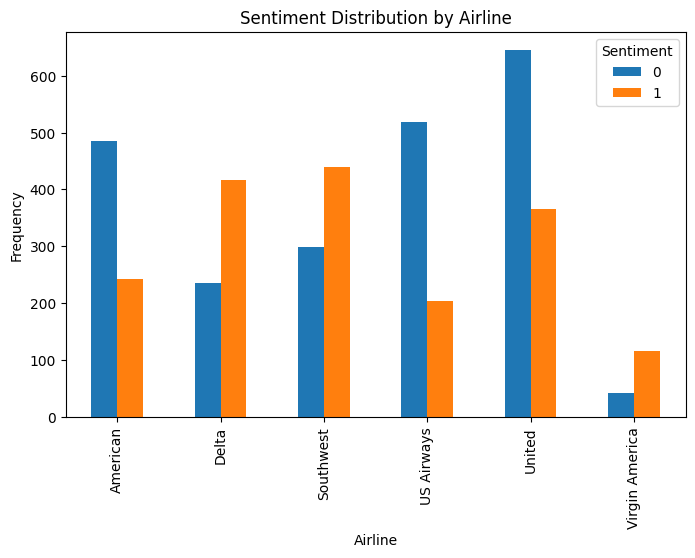

In [29]:

ct = pd.crosstab(df["airline"], df["sentiment"])
ct.plot(kind="bar", figsize=(8,5))
plt.title("Sentiment Distribution by Airline")
plt.xlabel("Airline")
plt.ylabel("Frequency")
plt.legend(title="Sentiment")
plt.show()

### Key Insights: 
1. Has Negation is more common in Negative Reviews than Positive Reviews
2. Some Airlines like American, US Airways and United have more Negative Reviews than Positive Reviews

Will Drop airline to avoid label leakage and ensure the model learned linguistic sentiment rather than brand bias

In [30]:
df = df.drop(["airline"], axis = 1)

#df_test = df_test.drop(["airline"], axis = 1)

df.columns.to_list()

['text',
 'retweet_count',
 'text_length',
 'word_count',
 'neg_word_count',
 'all_caps_count',
 'exclamations',
 'has_negation',
 'sentiment']

## Corpus Text Analysis


Top 20 most common words:
flight: 783
thanks: 358
get: 336
thank: 334
cancelled: 227
service: 225
customer: 213
great: 152
still: 151
got: 149
time: 148
can't: 132
back: 129
would: 129
gate: 126
plane: 122
one: 121
like: 121
hours: 120
hold: 119

GENERATING WORD CLOUDS


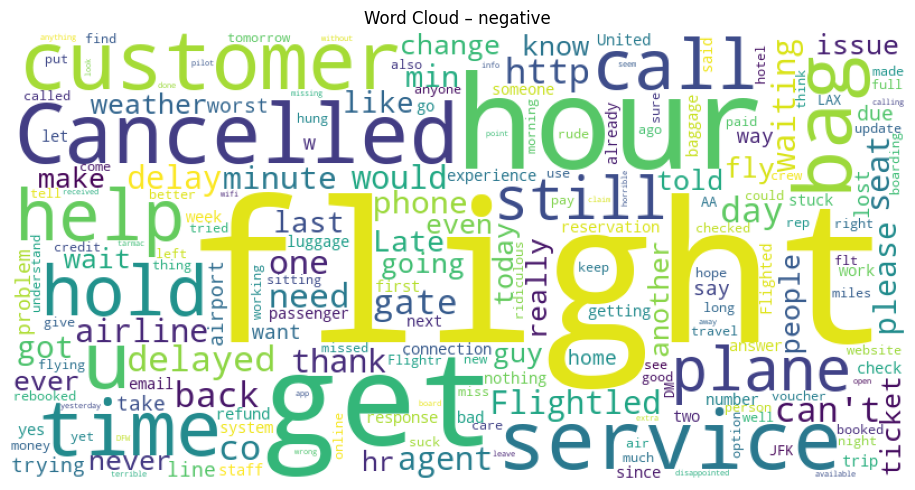


SAMPLE TEXTS BY SENTIMENT
  1.  thanks for the response. I know it's not your fault... But Im in ORD in T5 and hungry if you want to stop by ✈️✌️
  2.  "where we trick you into making us look popular on Twitter by being the worst airline"  
  3.  6 hours to get backs back after being sat on a plane for 4 hours to have flight Cancelled Flightled with only one small drink
  1.  I'm enjoying my flights so far! You're doing a great job. Today's been tough, so thanks for making my flights comfortable.
  2. Hey  you've upgraded me on a 10 hour International flight. I forgive you :-) thank you!
  3.  it was delivered! Thank you for making sure it arrived at my doorstep!

EDA COMPLETE


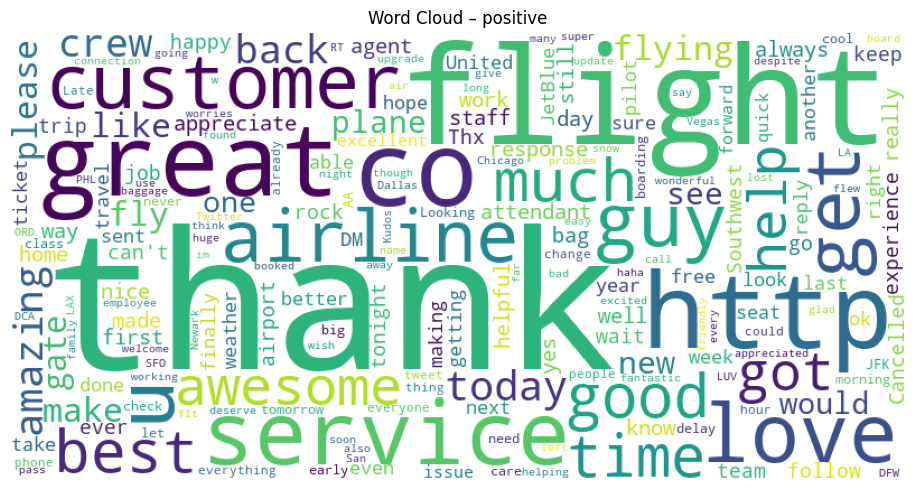


SAMPLE TEXTS BY SENTIMENT
  1.  thanks for the response. I know it's not your fault... But Im in ORD in T5 and hungry if you want to stop by ✈️✌️
  2.  "where we trick you into making us look popular on Twitter by being the worst airline"  
  3.  6 hours to get backs back after being sat on a plane for 4 hours to have flight Cancelled Flightled with only one small drink
  1.  I'm enjoying my flights so far! You're doing a great job. Today's been tough, so thanks for making my flights comfortable.
  2. Hey  you've upgraded me on a 10 hour International flight. I forgive you :-) thank you!
  3.  it was delivered! Thank you for making sure it arrived at my doorstep!

EDA COMPLETE


In [31]:
# Get all words
all_text = ' '.join(df['text'].astype(str))
words = all_text.lower().split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
words_filtered = [word for word in words if word not in stop_words and len(word) > 2]

# Most common words
word_freq = Counter(words_filtered)
print("\nTop 20 most common words:")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

# 5. WORD CLOUDS BY EMOTION
print("\n" + "="*50)
print("GENERATING WORD CLOUDS")
print("="*50)


for sentiment in df["sentiment"].unique():
    text_data = " ".join(
        df[df["sentiment"] == sentiment]["text"]
        .astype(str)
        .values
    )
 
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        stopwords=stop_words,
        #colormap=sentiment_colors.get(sentiment, "viridis"),
        max_words=200,
        collocations=False
    ).generate(text_data)

    if sentiment == 1: 
        label = 'positive'
    else:
        label = 'negative'
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Word Cloud – {label}")
    plt.tight_layout()
    plt.savefig('../images/Word_Cloud_by_'+label+'_sentiment.png')
    plt.show()


    print("\n" + "="*50)
    print("SAMPLE TEXTS BY SENTIMENT")
    print("="*50)

    for sentiment in [0,1]:
        samples = df[df['sentiment'] == sentiment]['text'].head(3).tolist()
        for i, sample in enumerate(samples, 1):
            print(f"  {i}. {sample}")

    print("\n" + "="*50)
    print("EDA COMPLETE")
    print("="*50)

In [32]:
def _clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\.\S+', '', text)   # remove urls
    text = re.sub(r"[^a-z\s!?]", "", text)          # keep ! and ?
    text = re.sub(r'\s+', ' ', text).strip()       # normalize whitespace

    return text

df['clean_text'] = df['text'].apply(_clean_text)
#df_test['clean_text']  = df_test['text'].apply(_clean_text)

In [33]:
## Spliting 

In [34]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.sentiment.values
y_val = df_val.sentiment.values
y_test = df_test.sentiment.values


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = df_train["clean_text"]

X_val = df_val['clean_text']

X_test = df_test['clean_text']

tfidf = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    max_df=0.9,
    min_df=5,
    max_features=5000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

In [36]:
from scipy.sparse import hstack

numeric_features = [
    "text_length",
    "word_count",
    "exclamations",
    "neg_word_count",
    "all_caps_count",
    "has_negation", 
    "retweet_count"
]

X_num_train = df_train[numeric_features]
X_num_val   = df_val[numeric_features]
X_num_test = df_test[numeric_features]

X_train_final = hstack([X_train_tfidf, X_num_train])
X_val_final   = hstack([X_val_tfidf, X_num_val])
X_test_final = hstack([X_test_tfidf, X_num_test])

## Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    solver="saga",
    n_jobs=-1
)


### Tuning Logistic Regression model for various Regularization (C) parameters

In [38]:
param_grid = {
    "C": [0.01, 0.1, 1, 5, 10],
    "penalty": ["l1", "l2"]
}

In [39]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=5,
    n_jobs=-1,
    verbose=2
)


In [40]:
grid_search.fit(X_train_final, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\mepri\SentimentAnalysis_Airlines\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\mepri\SentimentAnalysis_Airlines\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mepri\SentimentAnalysis_Airlines\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...solver='saga')
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_weighted'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : 

In [41]:
results = pd.DataFrame(grid_search.cv_results_)

f1_table = results[[
    "param_C",
    "param_penalty",
    "mean_test_score"
]].rename(columns={
    "mean_test_score": "f1_weighted",
    "param_penalty": "penalty"
})

f1_table.sort_values("param_C", inplace=True)
print(f1_table)

   param_C penalty  f1_weighted
0     0.01      l1     0.666466
1     0.01      l2     0.731275
2     0.10      l1     0.781486
3     0.10      l2     0.805145
4     1.00      l1     0.816713
5     1.00      l2     0.822109
6     5.00      l1     0.824259
7     5.00      l2     0.824244
8    10.00      l1     0.823501
9    10.00      l2     0.825111


In [42]:
best_log_params = grid_search.best_params_

In [43]:
print("Best parameters:", grid_search.best_params_)
print("Best CV F1:", grid_search.best_score_)
best_log_model = grid_search.best_estimator_

Best parameters: {'C': 10, 'penalty': 'l2'}
Best CV F1: 0.8251113119817346


### After parameter tuning Best F1 Score  = 0.8251113119817346 is achieved at C= 10, penalty = l2

In [44]:
from sklearn.metrics import classification_report, confusion_matrix


y_val_pred = best_log_model.predict(X_val_final)

print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       446
           1       0.80      0.79      0.80       356

    accuracy                           0.82       802
   macro avg       0.82      0.82      0.82       802
weighted avg       0.82      0.82      0.82       802

[[377  69]
 [ 75 281]]


### Precision for Best Model is 0.83 for negative sentiment and 0.80 for positive sentiment

In [45]:
y_probs = best_log_model.predict_proba(X_val_final)[:, 1]


### Threshold Tuning of Logistic Regression Model

In [46]:
thresholds= np.linspace(0,1,21).round(2)
acc_scores = []
#print("threshold | accuracy score")
for t in thresholds:
    decision = (y_probs >=t)
    ### score = (y_val == loan_decision).mean()*100
    if decision.sum() == 0:
        print(f"t={t:.2f} → no positive predictions, skipped")
        continue
        
    acc_scores.append(
    {
        "Threshold": t,
        "Precision" : precision_score(y_val, decision,zero_division=0),
         "Recall"  : recall_score(y_val, decision,zero_division=0),
        "F1 Score" : f1_score(y_val, decision, average = "weighted")
         }
    )


t=1.00 → no positive predictions, skipped


In [47]:
t_scores = pd.DataFrame(acc_scores)
t_scores

,Threshold,Precision,Recall,F1 Score
0,0.00,0.443890,1.000000,0.272927
1,0.05,0.463542,1.000000,0.359965
2,0.10,0.482900,0.991573,0.434592
3,0.15,0.539171,0.985955,0.581445
4,0.20,0.586149,0.974719,0.665744
5,0.25,0.611913,0.952247,0.700928
6,0.30,0.636711,0.935393,0.729055
7,0.35,0.665992,0.924157,0.758124
8,0.40,0.716186,0.907303,0.799104
9,0.45,0.765586,0.862360,0.822259


### For Logistic Regression 
### The best F1 Score 0.822259 is acheived at threshold = 0.45, hence we will consider 0.45 as threshold . <br> LogisticRegression Model is giving F1 Score  of 0.822259 and Precision= 0.765586, Recall = 0.862360 on validation set at threshold = 0.45

In [48]:
df_model_scores = pd.DataFrame(columns=["Model_name",'model',"model_parameters","decision_threshold", "Precision", "Recall", "F1 Score"])
df_model_scores.loc[len(df_model_scores)]=["LogisticRegression",best_log_model,best_log_params,0.45,0.765586,0.862360,0.822259]
df_model_scores

,Model_name,model,model_parameters,decision_threshold,Precision,Recall,F1 Score
0,LogisticRegression,"LogisticRegression(C=10, class_weight='balance...","{'C': 10, 'penalty': 'l2'}",0.45,0.765586,0.86236,0.822259


In [49]:
y_pred_test = best_log_model.predict_proba(X_test_final)[:, 1]
y_pred_prob = (y_pred_test >= 0.45).astype(int)

f1_score_test = f1_score(y_test, y_pred_prob)
prec_score_test = precision_score(y_test, y_pred_prob)
recall_test = recall_score(y_test, y_pred_prob)
print('F1 score on test set', f1_score_test)
print('Precision score on Test Set', prec_score_test)
print('Recall score on Test Set', recall_test)

F1 score on test set 0.8315789473684211
Precision score on Test Set 0.8144329896907216
Recall score on Test Set 0.8494623655913979


### F1 score on the unseen Test Set is 0.8315 Precision score on Test Set 0.814 Recall score on Test Set 0.849


## Linear SVC

In [50]:
from sklearn.svm import LinearSVC
print ("C      F1 Score weighted")
for C in [0.1, 0.5, 1, 2]:
    svm = LinearSVC(
    C=C,
    class_weight="balanced",
    random_state=42
    )

    svm.fit(X_train_final, y_train)
    y_pred = svm.predict(X_val_final)
    print(C, f1_score(y_val, y_pred, average = "weighted"))



C      F1 Score weighted
0.1 0.8519096223775268
0.5 0.8494207084679054
1 0.8382607613417452
2 0.8319678376250428


## Best F1 score =  0.851 is obtained at C = 0.1 on the validation set Hence we will create best model

In [51]:
svm_best = LinearSVC(
    C=0.1,
    class_weight="balanced",
    random_state=42
    )
svm_best.fit(X_train_final, y_train)
y_pred_best = svm_best.predict(X_val_final)

In [52]:

print(classification_report(y_val, y_pred_best))
print(confusion_matrix(y_val, y_pred_best))


              precision    recall  f1-score   support

           0       0.88      0.85      0.86       446
           1       0.82      0.86      0.84       356

    accuracy                           0.85       802
   macro avg       0.85      0.85      0.85       802
weighted avg       0.85      0.85      0.85       802

[[378  68]
 [ 51 305]]


### For Linear SVC Model Precision =  0.82 ,Recall = 0.86 for positive sentiment  and F1-Score weighted = 0.85 on the validation dataset 

In [53]:
best_svm_params = {'C':0.1,'class_weight':'balanced'}

In [54]:
df_model_scores.loc[len(df_model_scores)]=["LinearSVC",svm_best,best_svm_params,'NA',0.82,0.86,0.851909]

df_model_scores

,Model_name,model,model_parameters,decision_threshold,Precision,Recall,F1 Score
0,LogisticRegression,"LogisticRegression(C=10, class_weight='balance...","{'C': 10, 'penalty': 'l2'}",0.45,0.765586,0.86236,0.822259
1,LinearSVC,"LinearSVC(C=0.1, class_weight='balanced', rand...","{'C': 0.1, 'class_weight': 'balanced'}",NA,0.820000,0.86000,0.851909


In [55]:
y_pred_test = svm_best.predict(X_test_final)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.86      0.87      0.87       430
           1       0.85      0.83      0.84       372

    accuracy                           0.85       802
   macro avg       0.85      0.85      0.85       802
weighted avg       0.85      0.85      0.85       802

[[376  54]
 [ 63 309]]


### For Linear SVC Model Precision = 0.86 for negative senitment and precision = 0.85 for positive sentiment on the test dataset

## Complemnetary Naive Bayes

In [56]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import f1_score
import pandas as pd

alphas = [0.05, 0.1, 0.3, 0.5, 1.0, 2.0]

alpha_results = []

for a in alphas:
    cnb = ComplementNB(alpha=a)
    cnb.fit(X_train_final, y_train)

    y_pred = cnb.predict(X_val_final)
    f1 = f1_score(y_val, y_pred, average="weighted")

    alpha_results.append({
        "alpha": a,
        "f1_weighted": f1
    })

alpha_df = pd.DataFrame(alpha_results)
alpha_df

,alpha,f1_weighted
0,0.05,0.838624
1,0.10,0.838689
2,0.30,0.833552
3,0.50,0.833552
4,1.00,0.829453
5,2.00,0.806526


In [57]:
best_alpha = alpha_df.sort_values(
    "f1_weighted", ascending=False
).iloc[0]["alpha"]

best_alpha

np.float64(0.1)

In [58]:
best_cnb = ComplementNB(alpha=best_alpha)
best_cnb.fit(X_train_final, y_train)

y_pred_best = best_cnb.predict(X_val_final)

from sklearn.metrics import classification_report

print("Best alpha:", best_alpha)
print(classification_report(y_val, y_pred_best))

Best alpha: 0.1
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       446
           1       0.83      0.79      0.81       356

    accuracy                           0.84       802
   macro avg       0.84      0.83      0.84       802
weighted avg       0.84      0.84      0.84       802



In [59]:
best_cnb_params = {'alpha':0.1}

In [60]:
df_model_scores.loc[len(df_model_scores)]=["Complimentary Naive Bayes",best_cnb,best_cnb_params,'NA',0.83,0.79,0.84]


In [61]:

df_model_scores.T

,0,1,2
Model_name,LogisticRegression,LinearSVC,Complimentary Naive Bayes
model,"LogisticRegression(C=10, class_weight='balance...","LinearSVC(C=0.1, class_weight='balanced', rand...",ComplementNB(alpha=np.float64(0.1))
model_parameters,"{'C': 10, 'penalty': 'l2'}","{'C': 0.1, 'class_weight': 'balanced'}",{'alpha': 0.1}
decision_threshold,0.45,NA,NA
Precision,0.765586,0.82,0.83
Recall,0.86236,0.86,0.79
F1 Score,0.822259,0.851909,0.84


### Based on the above output we have chosen LinearSVC as our final model


## Final Model Prediction

### Training full dataset

In [62]:
df_full_train.shape

(3206, 10)

In [65]:
#df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.sentiment.values
X_full_train = df_full_train["clean_text"]
y_test = df_test.sentiment.values
X_test = df_test["clean_text"]


tfidf = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    max_df=0.9,
    min_df=5,
    max_features=5000
)

X_full_train_tfidf = tfidf.fit_transform(X_full_train)
X_num_full_train = df_full_train[numeric_features]
X_full_train_final = hstack([X_full_train_tfidf, X_num_full_train])

X_test_tfidf = tfidf.transform(X_test)
X_num_test = df_test[numeric_features]
X_test_final = hstack([X_test_tfidf, X_num_test])

svm_best = LinearSVC(
    C=0.1,
    class_weight="balanced",
    random_state=42
    )
svm_best.fit(X_full_train_final, y_full_train)

y_pred_test = svm_best.predict(X_test_final)


print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))





              precision    recall  f1-score   support

           0       0.87      0.89      0.88       430
           1       0.86      0.84      0.85       372

    accuracy                           0.87       802
   macro avg       0.87      0.86      0.86       802
weighted avg       0.87      0.87      0.87       802

[[381  49]
 [ 59 313]]
